# Imports and functions

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_style("ticks")

In [2]:
data = pd.read_csv('extracted_log.csv')

print(len(data))

data['kfold'] = '/content/drive/My Drive/logs/kfold'
data['free_energy_subtract'] = data['measure/evaluate/Free/mean_free_energy_train'] - data['measure/evaluate/Free/mean_free_energy_validation']
data.head(5)

6795


,evaluate,wall_time,step,measure/reconstruction/error,measure/activation/mean,measure/activation/std,measure/parameters/W/mean,measure/parameters/b_h/mean,measure/parameters/b_v/mean,measure/reconstruction_1/hamming,...,class,visible_size,hidden_size,regularization,learning_rate,sampling_method,momentum,path,kfold,free_energy_subtract
0,0,1.554514e+09,1,0.123056,5.932292,4.945068,0.011141,1.464530,-4.460237,3.020255,...,RBMCF,702,50,NoRegularization-0.0,Adam-0.02-0.9-0.999-1e-08,CD-1,0,/content/drive/My Drive/logs/kfold=0/kfold-int...,/content/drive/My Drive/logs/kfold,0.049065
1,1,1.554514e+09,11,0.123617,6.048032,5.578133,-0.004183,-0.593826,-4.583196,3.029514,...,RBMCF,702,50,NoRegularization-0.0,Adam-0.02-0.9-0.999-1e-08,CD-1,0,/content/drive/My Drive/logs/kfold=0/kfold-int...,/content/drive/My Drive/logs/kfold,-0.096493
2,2,1.554514e+09,21,0.117827,5.975116,4.792783,-0.019905,-1.009531,-4.742973,2.984954,...,RBMCF,702,50,NoRegularization-0.0,Adam-0.02-0.9-0.999-1e-08,CD-1,0,/content/drive/My Drive/logs/kfold=0/kfold-int...,/content/drive/My Drive/logs/kfold,-0.270360
3,3,1.554514e+09,31,0.113758,5.976852,4.588584,-0.030012,-1.225968,-4.784292,2.974537,...,RBMCF,702,50,NoRegularization-0.0,Adam-0.02-0.9-0.999-1e-08,CD-1,0,/content/drive/My Drive/logs/kfold=0/kfold-int...,/content/drive/My Drive/logs/kfold,-0.449399
4,4,1.554514e+09,41,0.113049,5.961227,4.518751,-0.040611,-1.476685,-4.843041,2.990162,...,RBMCF,702,50,NoRegularization-0.0,Adam-0.02-0.9-0.999-1e-08,CD-1,0,/content/drive/My Drive/logs/kfold=0/kfold-int...,/content/drive/My Drive/logs/kfold,-0.616257


In [3]:
data.columns

Index(['evaluate', 'wall_time', 'step', 'measure/reconstruction/error',
       'measure/activation/mean', 'measure/activation/std',
       'measure/parameters/W/mean', 'measure/parameters/b_h/mean',
       'measure/parameters/b_v/mean', 'measure/reconstruction_1/hamming',
       'details/measure/top-1/evaluate-0/train',
       'details/measure/top-1/evaluate-0/validation',
       'details/measure/top-1/evaluate-1/train',
       'details/measure/top-1/evaluate-1/validation',
       'details/measure/top-1/evaluate-2/train',
       'details/measure/top-1/evaluate-2/validation',
       'details/measure/top-1/evaluate-3/train',
       'details/measure/top-1/evaluate-3/validation',
       'details/measure/top-1/evaluate-4/train',
       'details/measure/top-1/evaluate-4/validation',
       'details/measure/top-1/evaluate-5/train',
       'details/measure/top-1/evaluate-5/validation',
       'measure/evaluate/top-1/train', 'measure/evaluate/top-1/validation',
       'details/measure/top-5/eva

## Compare RMSE and Free Energy GAP

In [4]:
hyper_params_columns = [
    'class', 'hidden_size',
    'learning_rate', 'momentum',
    'regularization', 'batch_size', 'sampling_method', 'path'
]

metrics_columns = [
    'measure/evaluate/top-1/train',
    'measure/evaluate/top-1/validation',
    'measure/evaluate/top-5/train',
    'measure/evaluate/top-5/validation',
]

def filter_df(df, filters):
    return (df[list(filters)] == pd.Series(filters)).all(axis=1)

def plot_model(top1):
    filters = {
        'class': top1['class'],
        'hidden_size': top1['hidden_size'],
        'learning_rate': top1['learning_rate'],
        'momentum': top1['momentum'],
        'sampling_method': top1['sampling_method'],
        'batch_size': top1['batch_size'],
    }
    
    columns_new_name = [
        'Hit@1 - Base de treino',
        'Hit@1 - Base de teste',
        'Hit@5 - Base de treino',
        'Hit@5 - Base de teste',
    ]
    colors=['#223334', '#223334', 'r', 'r']
    styles=['--', '-', '--', '-']

    result = data[data['path'] == top1.path][metrics_columns + ['step']]
    result = result.set_index('step')
    result.columns = columns_new_name

    ax = result.plot(style=styles, color=colors)
    ax.legend(bbox_to_anchor=(1, 1))
    ax.get_figure().suptitle(filters['class'])
    ax.set_title(filters);
    ax.set_xlabel('Época')
    ax.set_ylabel('Taxa');
    sns.despine();

def plot_column(top1, column):
    filters = {
        'class': top1['class'],
        'hidden_size': top1['hidden_size'],
        'learning_rate': top1['learning_rate'],
        'momentum': top1['momentum'],
        'sampling_method': top1['sampling_method'],
        'batch_size': top1['batch_size'],
    }
    result = data[data['path'] == top1.path][[column, 'step']]
    result = result.set_index('step')
    
    colors=['#223334', '#223334', 'r', 'r']
    styles=['--', '-', '--', '-']

    ax = result.plot(style=styles, color=colors)
    ax.set_title(column);

## Print sorted results

In [11]:
last_epoch = (data.batch_size==64) & (data.evaluate==96)  \
           | (data.batch_size==100) & (data.evaluate==150)

last_epoch = (data.evaluate == data.evaluate.max())
print("Top 1")
# Mean not changes results because there are only one by group
data[last_epoch] \
    .set_index(['kfold']) \
    .groupby(['path', 'class', 'batch_size']).mean()[['measure/evaluate/reconstruction/RMSE_validation', 'measure/evaluate/top-1/validation', 'measure/evaluate/top-5/validation']] \
    .sort_values('measure/evaluate/top-1/validation', ascending=False) \
    .head()

Top 1


,,,measure/evaluate/reconstruction/RMSE_validation,measure/evaluate/top-1/validation,measure/evaluate/top-5/validation
path,class,batch_size,,,
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=10000/regularization=NoRegularization-0.0/learning_rate=Adam-0.0001-0.9-0.999-1e-08/sampling_method=CD-DefinedDecay/momentum=0/1554636452.313265/events.out.tfevents.1554636456.bbd34d86058f,RBMCF,10,0.078247,0.327560,0.499615
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=10000/regularization=NoRegularization-0.0/learning_rate=Adam-0.0001-0.9-0.999-1e-08/sampling_method=CD-1/momentum=0/1554567300.3627598/events.out.tfevents.1554567303.e3996e64f837,RBMCF,10,0.078254,0.326790,0.503464
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=10000/regularization=NoRegularization-0.0/learning_rate=Adam-0.05-0.9-0.999-1e-08/sampling_method=CD-DefinedDecay/momentum=0/1554621455.7188308/events.out.tfevents.1554621459.bbd34d86058f,RBMCF,10,0.039771,0.322941,0.471132
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=500/regularization=NoRegularization-0.0/learning_rate=Adam-0.05-0.9-0.999-1e-08/sampling_method=CD-1/momentum=0/1554518973.0413513/events.out.tfevents.1554518975.10baf2fa60e6,RBMCF,10,0.039476,0.321401,0.481524
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=10000/regularization=NoRegularization-0.0/learning_rate=Adam-0.02-0.9-0.999-1e-08/sampling_method=CD-DefinedDecay/momentum=0/1554613953.181891/events.out.tfevents.1554613959.bbd34d86058f,RBMCF,10,0.032079,0.316397,0.476520
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=1000/regularization=NoRegularization-0.0/learning_rate=Adam-0.05-0.9-0.999-1e-08/sampling_method=CD-1/momentum=0/1554523505.6820467/events.out.tfevents.1554523508.10baf2fa60e6,RBMCF,10,0.037794,0.314088,0.471517
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=10000/regularization=NoRegularization-0.0/learning_rate=Adam-0.05-0.9-0.999-1e-08/sampling_method=CD-1/momentum=0/1554556242.0651321/events.out.tfevents.1554556246.e3996e64f837,RBMCF,10,0.038822,0.313703,0.469592
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=1000/regularization=NoRegularization-0.0/learning_rate=Adam-0.05-0.9-0.999-1e-08/sampling_method=CD-DefinedDecay/momentum=0/1554590472.0189097/events.out.tfevents.1554590474.e3996e64f837,RBMCF,10,0.040325,0.311778,0.475366
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=500/regularization=NoRegularization-0.0/learning_rate=Adam-0.02-0.9-0.999-1e-08/sampling_method=CD-5/momentum=0/1554651767.52044/events.out.tfevents.1554651771.bbd34d86058f,RBMCF,10,0.031720,0.311393,0.467667


In [6]:
print("Top 5")

# Mean not changes results because there are only one by group
data[last_epoch] \
    .set_index(['kfold']) \
    .groupby(['path', 'class', 'batch_size']).mean()[['measure/evaluate/reconstruction/RMSE_validation', 'measure/evaluate/top-1/validation', 'measure/evaluate/top-5/validation']] \
    .sort_values('measure/evaluate/top-5/validation', ascending=False) \
    .head()

Top 5


,,,measure/evaluate/reconstruction/RMSE_validation,measure/evaluate/top-1/validation,measure/evaluate/top-5/validation
path,class,batch_size,,,
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=10000/regularization=NoRegularization-0.0/learning_rate=Adam-0.0001-0.9-0.999-1e-08/sampling_method=CD-1/momentum=0/1554567300.3627598/events.out.tfevents.1554567303.e3996e64f837,RBMCF,10,0.078254,0.326790,0.503464
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=10000/regularization=NoRegularization-0.0/learning_rate=Adam-0.0001-0.9-0.999-1e-08/sampling_method=CD-DefinedDecay/momentum=0/1554636452.313265/events.out.tfevents.1554636456.bbd34d86058f,RBMCF,10,0.078247,0.327560,0.499615
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=500/regularization=NoRegularization-0.0/learning_rate=Adam-0.001-0.9-0.999-1e-08/sampling_method=CD-DefinedDecay/momentum=0/1554584309.900344/events.out.tfevents.1554584312.e3996e64f837,RBMCF,10,0.062933,0.280600,0.490377
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=50/regularization=NoRegularization-0.0/learning_rate=Adam-0.05-0.9-0.999-1e-08/sampling_method=CD-1/momentum=0/1554515107.5681975/events.out.tfevents.1554515110.10baf2fa60e6,RBMCF,10,0.049765,0.289069,0.485758
/content/drive/My Drive/logs/kfold=0/kfold-intern=0/batch_size=10/class=RBMCF/visible_size=702/hidden_size=500/regularization=NoRegularization-0.0/learning_rate=Adam-0.05-0.9-0.999-1e-08/sampling_method=CD-1/momentum=0/1554518973.0413513/events.out.tfevents.1554518975.10baf2fa60e6,RBMCF,10,0.039476,0.321401,0.481524


## Plot models

Best 5: Smallest RMSE in validation dataset


,measure/evaluate/reconstruction/RMSE_validation,measure/evaluate/top-1/train,measure/evaluate/top-1/validation,measure/evaluate/top-5/train,measure/evaluate/top-5/validation,class,hidden_size,learning_rate,momentum,regularization,batch_size,sampling_method,path
4529,0.031549,0.851755,0.292533,0.972704,0.468437,RBMCF,1000,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
2717,0.031698,0.786941,0.302540,0.951678,0.461124,RBMCF,500,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-1,/content/drive/My Drive/logs/kfold=0/kfold-int...
3019,0.031720,0.854842,0.311393,0.975887,0.467667,RBMCF,500,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-5,/content/drive/My Drive/logs/kfold=0/kfold-int...
3170,0.031720,0.854842,0.311393,0.975887,0.467667,RBMCF,500,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-5,/content/drive/My Drive/logs/kfold=0/kfold-int...
2868,0.031900,0.850116,0.310239,0.967014,0.479600,RBMCF,500,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...


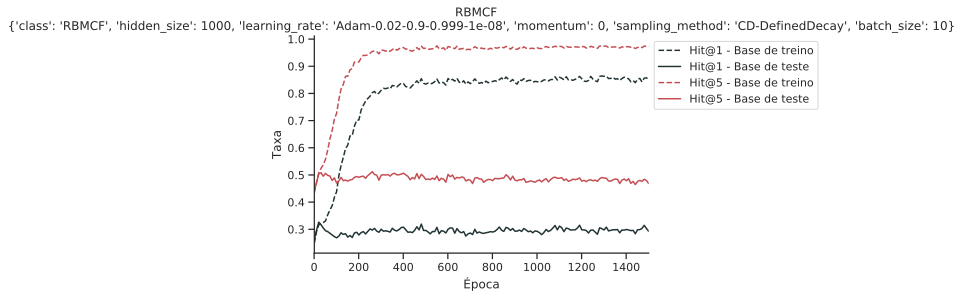

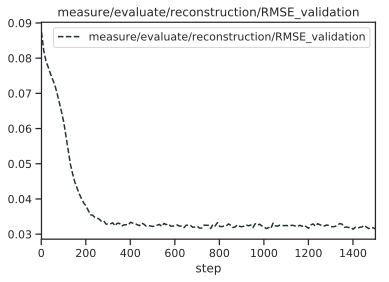

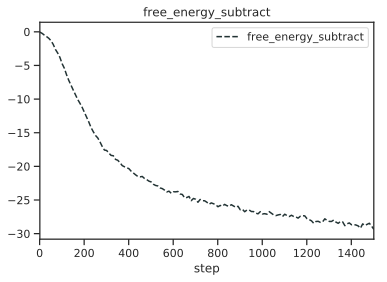

In [7]:
print("Best 5: Smallest RMSE in validation dataset")

top5 = data[last_epoch].sort_values('measure/evaluate/reconstruction/RMSE_validation', ascending=True)[['measure/evaluate/reconstruction/RMSE_validation'] + metrics_columns + hyper_params_columns].head()

# Best free energy gap
plot_model(top5.iloc[0])
plot_column(top5.iloc[0], 'measure/evaluate/reconstruction/RMSE_validation')
plot_column(top5.iloc[0], 'free_energy_subtract')

top5

Best 5: Biggest mean Free Energy gap between validation and a noise data


,measure/evaluate/Free/mean_free_energy_gap,measure/evaluate/top-1/train,measure/evaluate/top-1/validation,measure/evaluate/top-5/train,measure/evaluate/top-5/validation,class,hidden_size,learning_rate,momentum,regularization,batch_size,sampling_method,path
1056,92.068771,0.782022,0.278291,0.939911,0.456890,RBMCF,50,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-5,/content/drive/My Drive/logs/kfold=0/kfold-int...
1207,91.668083,0.782022,0.278291,0.939911,0.456890,RBMCF,50,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-5,/content/drive/My Drive/logs/kfold=0/kfold-int...
754,91.011169,0.759163,0.289069,0.943480,0.485758,RBMCF,50,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-1,/content/drive/My Drive/logs/kfold=0/kfold-int...
905,89.221954,0.786073,0.280600,0.949171,0.471901,RBMCF,50,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
3321,88.673508,0.825039,0.321401,0.968171,0.481524,RBMCF,500,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-1,/content/drive/My Drive/logs/kfold=0/kfold-int...


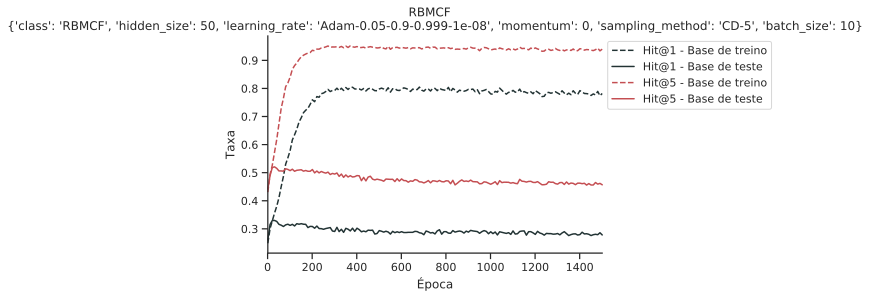

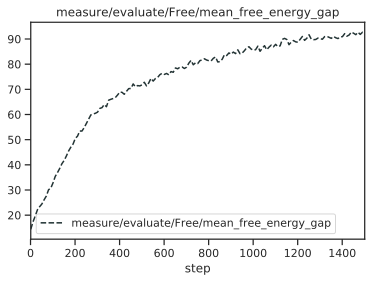

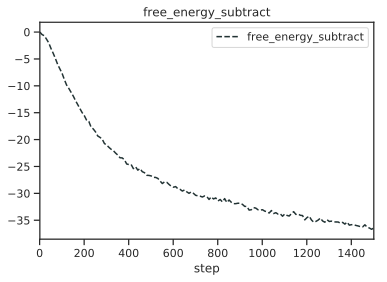

In [8]:
print("Best 5: Biggest mean Free Energy gap between validation and a noise data")

top5 = data[last_epoch].sort_values('measure/evaluate/Free/mean_free_energy_gap', ascending=False)[['measure/evaluate/Free/mean_free_energy_gap'] + metrics_columns + hyper_params_columns].head()

plot_model(top5.iloc[0])
plot_column(top5.iloc[0], 'measure/evaluate/Free/mean_free_energy_gap')
plot_column(top5.iloc[0], 'free_energy_subtract')

top5

Best 5 top-1 value in last epoch


,evaluate,measure/evaluate/top-1/train,measure/evaluate/top-1/validation,measure/evaluate/top-5/train,measure/evaluate/top-5/validation,class,hidden_size,learning_rate,momentum,regularization,batch_size,sampling_method,path
4831,150,0.852334,0.311778,0.973476,0.475366,RBMCF,1000,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
4529,150,0.851755,0.292533,0.972704,0.468437,RBMCF,1000,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
5284,150,0.464892,0.139723,0.658854,0.262510,RBMCF,1000,AdaptiveLearningRate,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...


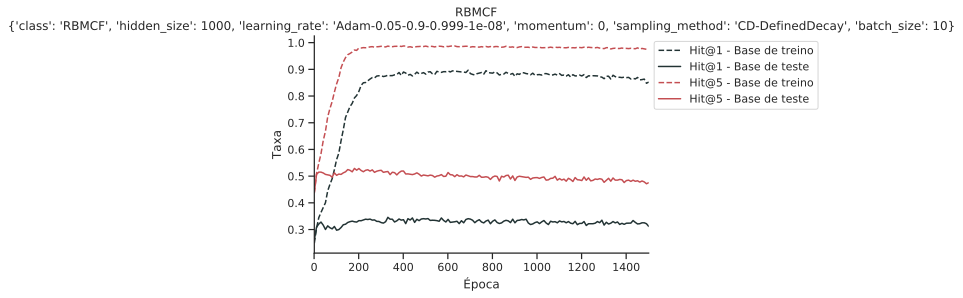

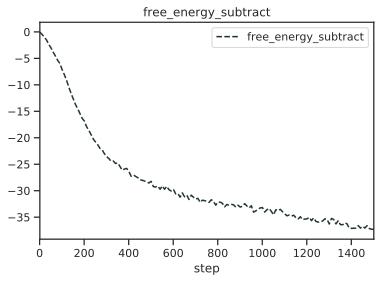

In [14]:
print('Best 5 top-1 value in last epoch')

top5 = data[last_epoch & (data['hidden_size'] == 1000) & (data['sampling_method'] == 'CD-DefinedDecay')].sort_values('measure/evaluate/top-1/validation', ascending=False)[['evaluate'] + metrics_columns + hyper_params_columns].head()

plot_model(top5.iloc[0])
plot_column(top5.iloc[0], 'free_energy_subtract')

top5

Best 5 top-1 value in any epoch


,evaluate,measure/evaluate/top-1/train,measure/evaluate/top-1/validation,measure/evaluate/top-5/train,measure/evaluate/top-5/validation,class,hidden_size,learning_rate,momentum,regularization,batch_size,sampling_method,path
5919,30,0.868056,0.349885,0.983796,0.525789,RBMCF,10000,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
5908,19,0.806809,0.348730,0.968364,0.525789,RBMCF,10000,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
5921,32,0.879340,0.347960,0.984857,0.520400,RBMCF,10000,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
5912,23,0.856771,0.347960,0.983121,0.531178,RBMCF,10000,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
5791,53,0.844522,0.346805,0.979263,0.515012,RBMCF,10000,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-1,/content/drive/My Drive/logs/kfold=0/kfold-int...


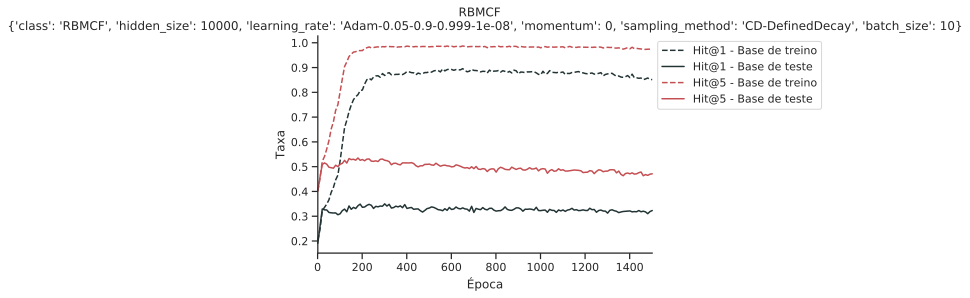

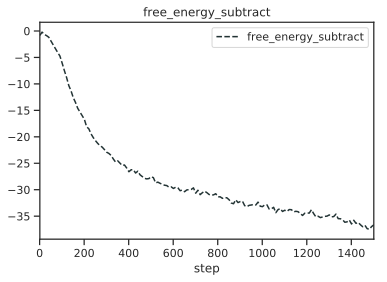

In [10]:
print('Best 5 top-1 value in any epoch')

top5 = data.sort_values('measure/evaluate/top-1/validation', ascending=False)[['evaluate'] + metrics_columns + hyper_params_columns].head()

plot_model(top5.iloc[0])
plot_column(top5.iloc[0], 'free_energy_subtract')

top5

## Other run

,evaluate,measure/evaluate/top-1/train,measure/evaluate/top-1/validation,measure/evaluate/top-5/train,measure/evaluate/top-5/validation,class,hidden_size,learning_rate,momentum,regularization,batch_size,sampling_method,path
150,150,0.764853,0.286374,0.931038,0.477290,RBMCF,50,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-1,/content/drive/My Drive/logs/kfold=0/kfold-int...
301,150,0.791667,0.282140,0.937500,0.466128,RBMCF,50,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-DefinedDecay,/content/drive/My Drive/logs/kfold=0/kfold-int...
452,150,0.793403,0.282525,0.938561,0.475751,RBMCF,50,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-5,/content/drive/My Drive/logs/kfold=0/kfold-int...
603,150,0.793403,0.282525,0.938561,0.475751,RBMCF,50,Adam-0.02-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-5,/content/drive/My Drive/logs/kfold=0/kfold-int...
754,150,0.759163,0.289069,0.943480,0.485758,RBMCF,50,Adam-0.05-0.9-0.999-1e-08,0,NoRegularization-0.0,10,CD-1,/content/drive/My Drive/logs/kfold=0/kfold-int...


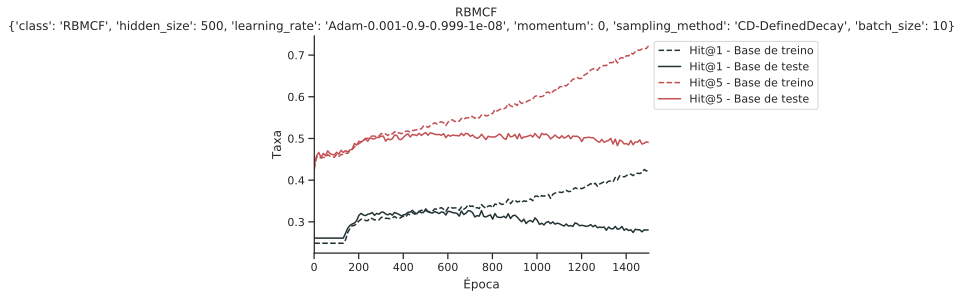

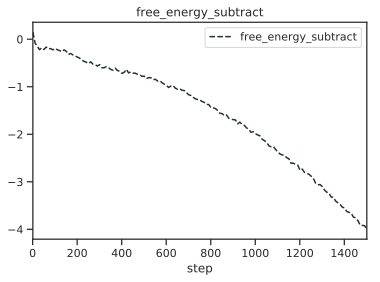

In [14]:
plot_model(
#    data[(last_epoch) & (data['hidden_size'] == 100)] \
    data[(data.evaluate == data.evaluate.max()) & (data['hidden_size'] == 500) & (data['class'] == 'RBMCF')] \
        .sort_values('measure/evaluate/top-5/validation', ascending=False)[['evaluate'] + metrics_columns + hyper_params_columns].head().iloc[0]
)
#
#data[(last_epoch) & (data['hidden_size'] == 100)].sort_values('measure/evaluate/top-5/validation', ascending=False)[['evaluate'] + metrics_columns + hyper_params_columns].head()
plot_column(
    data[(data.evaluate == data.evaluate.max()) & (data['hidden_size'] == 500) & (data['class'] == 'RBMCF')] \
        .sort_values('measure/evaluate/top-5/validation', ascending=False)[['evaluate'] + metrics_columns + hyper_params_columns].head().iloc[0]
    , 'free_energy_subtract')

data[data.evaluate == data.evaluate.max()][['evaluate'] + metrics_columns + hyper_params_columns].head()


## RMSE

In [33]:
filters = {
    'class': 'RBMCF',
    'learning_rate': 'ConstantLearningRate-0.2',
    'batch_size': 10,
    'momentum': 1,
    'sampling_method': 'CD-1',
    'hidden_size': 500
}

'''
filters = {
    'class': 'RBM',
    'learning_rate': 'ConstantLearningRate-0.1',
    'batch_size': 10,
    'momentum': 1,
    'sampling_method': 'CD-1',
    'hidden_size': 1000
}
'''

columns = [
    'measure/evaluate/top-5/train',
    'measure/evaluate/top-5/validation',
    'measure/evaluate/top-1/train',
    'measure/evaluate/top-1/validation',
    'measure/evaluate/expectation/normalized/train',
    'measure/evaluate/expectation/normalized/validation',
]
columns_new_name = [
    'Hit@5 - Base de treino',
    'Hit@5 - Base de teste',
    'Hit@1 - Base de treino',
    'Hit@1 - Base de teste',
    'Hit@1-Esperança - Base de treino',
    'Hit@1-Esperança - Base de teste',
]
colors=['#223334', '#223334', 'r', 'r', 'y', 'y']
styles=['--', '-', '--', '-', '--', '-']

result = data[filter_df(data, filters)].groupby(['step']).mean()[columns]
result.columns = columns_new_name

ax = result.plot(style=styles, color=colors)
ax.legend(bbox_to_anchor=(1, 1))
ax.get_figure().suptitle('RBM-CF')
ax.set_title(r'$\eta$=0.2, $K$=' + str(filters['hidden_size']));
ax.set_xlabel('Época')
ax.set_ylabel('Taxa');
sns.despine();
ax.get_figure().savefig("rbm-cf-metricas.pdf", bbox_inches='tight')

KeyError: "['measure/evaluate/expectation/normalized/validation', 'measure/evaluate/expectation/normalized/train'] not in index"

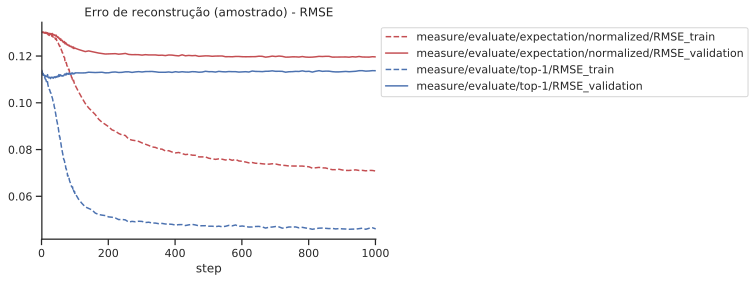

In [6]:
columns = [
    'measure/evaluate/expectation/normalized/RMSE_train',
    'measure/evaluate/expectation/normalized/RMSE_validation',
    #'measure/evaluate/top-5/RMSE_train',
    #'measure/evaluate/top-5/RMSE_validation',
    'measure/evaluate/top-1/RMSE_train',
    'measure/evaluate/top-1/RMSE_validation',
    #'measure/evaluate/top-1/train',
    #'measure/evaluate/top-1/validation'
]

styles=['r--', 'r', 'b--', 'b', ]

ax = data[filter_df(data, filters)].groupby(['step']).mean()[columns].plot(style=styles)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Erro de reconstrução (amostrado) - RMSE');
sns.despine();

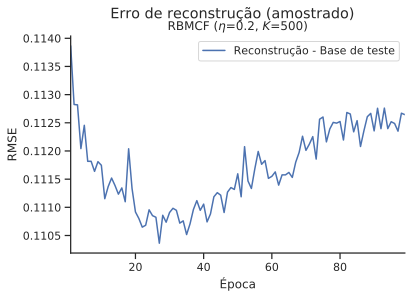

In [51]:
columns = [
    'measure/evaluate/top-1/RMSE_validation_y_predicted',
    #'measure/evaluate/top-1/RMSE_train_y_predicted'
]
columns_new_name = [
    'Reconstrução - Base de teste'
]

colors=['b']
styles=['-']

result = data[filter_df(data, filters) & (data['step']<100)].groupby(['step']).mean()[columns]
result.columns = columns_new_name

ax = result.plot(style=styles, color=colors)
ax.legend(bbox_to_anchor=(1, 1))
ax.get_figure().suptitle('Erro de reconstrução (amostrado)')
ax.set_title(filters['class'] + r' ($\eta$=0.2, $K$=' + str(filters['hidden_size']) + ')');
ax.set_xlabel('Época')
ax.set_ylabel('RMSE');
sns.despine();
ax.get_figure().savefig("rbm-cf-reconstrucao.pdf", bbox_inches='tight')

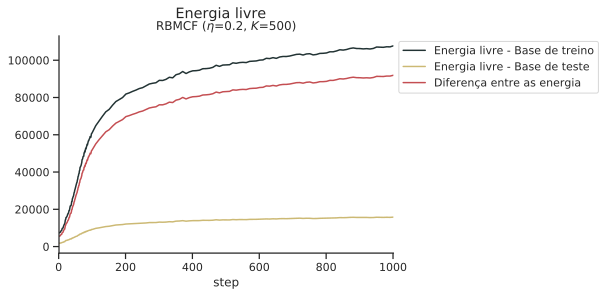

In [55]:
columns = [
    'measure/evaluate/Free/mean_free_energy_train_',
    'measure/evaluate/Free/mean_free_energy_validation',
    'measure/evaluate/Free/diff_mean_free_energy_',
]
columns_new_name = [
    'Energia livre - Base de treino',
    'Energia livre - Base de teste',
    'Diferença entre as energia'
]

styles=['#223334', 'y', 'r']

result = data[filter_df(data, filters)].groupby(['step']).mean().abs()[columns]
result.columns = columns_new_name
ax = result.plot(style=styles)
ax.get_figure().suptitle('Energia livre')
ax.set_title(filters['class'] + r' ($\eta$=0.2, $K$=' + str(filters['hidden_size']) + ')');
ax.legend(bbox_to_anchor=(1, 1))

sns.despine();
ax.get_figure().savefig("rbm-cf-energia.pdf", bbox_inches='tight')

# Best hyperparameters

In [47]:
def evaluate(column):
    parameters = ['class', 'hidden_size', 'learning_rate', 'kfold', 'kfold-intern']

    result = data \
        .groupby(parameters).max(level=column) \
        .groupby(parameters[:-1]).mean() \
        .groupby(parameters[:-2]).mean()[[column]].reset_index()
    
    result.rename(columns={column: 'mean'}, inplace=True)
    result['type'] = column
    return result

columns_evaluated = ['measure/evaluate/expectation/normalized/validation', 'measure/evaluate/top-5/validation', 'measure/evaluate/top-1/validation']

evaluation = pd.concat([evaluate(column) for column in columns_evaluated])
evaluation.head(3)
#print(accuracy.max(), accuracy.max().index)

,class,hidden_size,learning_rate,mean,type
0,RBM,1000,ConstantLearningRate-0.1,0.113487,measure/evaluate/expectation/normalized/valida...
1,RBMCF,500,ConstantLearningRate-0.2,0.167990,measure/evaluate/expectation/normalized/valida...
0,RBM,1000,ConstantLearningRate-0.1,0.460167,measure/evaluate/top-5/validation


In [49]:
print("WRONG!!!")
evaluation.groupby(['type', 'class']).max().sort_values('mean', ascending=False)


WRONG!!!


hidden_size  \
type                                               class                
measure/evaluate/top-5/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/top-1/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/expectation/normalized/validation RBMCF          500   
                                                   RBM           1000   

                                                                     learning_rate  \
type                                               class                             
measure/evaluate/top-5/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/top-1/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/expectation/normalized/validation RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   

                                                              mean  
type                                               class            
measure/evaluate/top-5/validation                  RBMCF  0.491844  
                                                   RBM    0.460167  
measure/evaluate/top-1/validation                  RBMCF  0.287963  
                                                   RBM    0.260843  
measure/evaluate/expectation/normalized/validation RBMCF  0.167990  
                                                   RBM    0.113487

In [50]:
print('CORRECT!')

best_results = evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate']).max()
best_results.reset_index()\
    .sort_values('mean', ascending=False)\
    .drop_duplicates(['type', 'class'])\
    .set_index(['type', 'class'])
#best_results
#best_results#.idxmax()
#evaluation.groupby(['type', 'class']).max()

CORRECT!


hidden_size  \
type                                               class                
measure/evaluate/top-5/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/top-1/validation                  RBMCF          500   
                                                   RBM           1000   
measure/evaluate/expectation/normalized/validation RBMCF          500   
                                                   RBM           1000   

                                                                     learning_rate  \
type                                               class                             
measure/evaluate/top-5/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/top-1/validation                  RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   
measure/evaluate/expectation/normalized/validation RBMCF  ConstantLearningRate-0.2   
                                                   RBM    ConstantLearningRate-0.1   

                                                              mean  
type                                               class            
measure/evaluate/top-5/validation                  RBMCF  0.491844  
                                                   RBM    0.460167  
measure/evaluate/top-1/validation                  RBMCF  0.287963  
                                                   RBM    0.260843  
measure/evaluate/expectation/normalized/validation RBMCF  0.167990  
                                                   RBM    0.113487

In [51]:
evaluation.groupby(['type', 'class', 'hidden_size', 'learning_rate'])\
    .max()\
    .reset_index()\
    .pivot_table(index=['type', 'class', 'learning_rate'], columns=['hidden_size'])

mean  \
hidden_size                                                                            500    
type                                               class learning_rate                        
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.1       NaN   
                                                   RBMCF ConstantLearningRate-0.2  0.167990   
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.1       NaN   
                                                   RBMCF ConstantLearningRate-0.2  0.287963   
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.1       NaN   
                                                   RBMCF ConstantLearningRate-0.2  0.491844   

                                                                                             
hidden_size                                                                            1000  
type                                               class learning_rate                       
measure/evaluate/expectation/normalized/validation RBM   ConstantLearningRate-0.1  0.113487  
                                                   RBMCF ConstantLearningRate-0.2       NaN  
measure/evaluate/top-1/validation                  RBM   ConstantLearningRate-0.1  0.260843  
                                                   RBMCF ConstantLearningRate-0.2       NaN  
measure/evaluate/top-5/validation                  RBM   ConstantLearningRate-0.1  0.460167  
                                                   RBMCF ConstantLearningRate-0.2       NaN

# Individual analisys

In [12]:
#columns = [f'details/measure/expectation/normalized/evaluate-{i}/validation' for i in range(6)]
columns = [f'details/measure/top-5/evaluate-{i}/validation' for i in range(6)]
full_columns = columns + ['measure/evaluate/expectation/normalized/train', 'measure/evaluate/expectation/normalized/validation'] \
             + ['measure/evaluate/top-1/validation', 'measure/evaluate/top-5/validation']

data[data["class"] == 'RBMCF'][full_columns].idxmax()

details/measure/top-5/evaluate-0/validation            4547
details/measure/top-5/evaluate-1/validation            7172
details/measure/top-5/evaluate-2/validation           12224
details/measure/top-5/evaluate-3/validation           10102
details/measure/top-5/evaluate-4/validation            1112
details/measure/top-5/evaluate-5/validation            3435
measure/evaluate/expectation/normalized/train          5246
measure/evaluate/expectation/normalized/validation    17977
measure/evaluate/top-1/validation                     10505
measure/evaluate/top-5/validation                     10306
dtype: int64

kfold=2/kfold-intern=1/batch_size=10/class=RBMCF/visible_size=702/hidden_size=100/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.2/sampling_method=CD-1/momentum=1/1542855678.6966267/events.out.tfevents.1542855682.paulo-notebook


Text(0.5, 1.0, 'RBM-CF - Best validation performance')

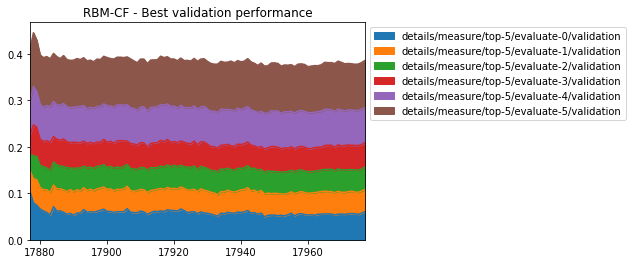

In [13]:
detail_filter = data.iloc[17977].path

print(detail_filter)
#ax = data[data['details'].str.contains(detail_filter)][full_columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM-CF - Best validation performance')

In [14]:
data[data["class"] == 'RBM'][full_columns].idxmax()

details/measure/top-5/evaluate-0/validation            1818
details/measure/top-5/evaluate-1/validation             405
details/measure/top-5/evaluate-2/validation            4451
details/measure/top-5/evaluate-3/validation            5966
details/measure/top-5/evaluate-4/validation             305
details/measure/top-5/evaluate-5/validation            2122
measure/evaluate/expectation/normalized/train         11407
measure/evaluate/expectation/normalized/validation    11406
measure/evaluate/top-1/validation                      1819
measure/evaluate/top-5/validation                      5758
dtype: int64

kfold=4/kfold-intern=0/batch_size=10/class=RBM/visible_size=702/hidden_size=1000/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.1/sampling_method=CD-1/momentum=1/1542903493.2974353/events.out.tfevents.1542903497.ff69adec0143


Text(0.5, 1.0, 'RBM - Best validation performance')

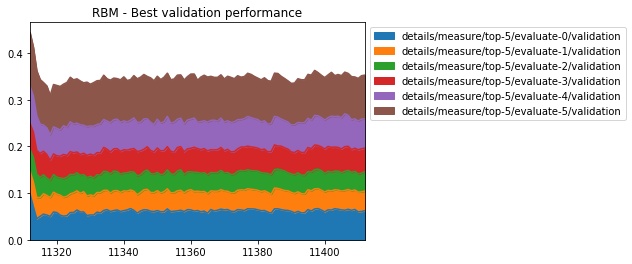

In [15]:
detail_filter = data.iloc[11406].path

print(detail_filter)
#ax = data[data['path'].str.contains(detail_filter)][columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Best validation performance')

In [16]:
#data[(data["class"] == 'RBM') & (data['path'].str.contains('id=50'))][full_columns].idxmax()

Text(0.5, 1.0, 'RBM - Validation performance to the best 5º effect in the last eppoch')

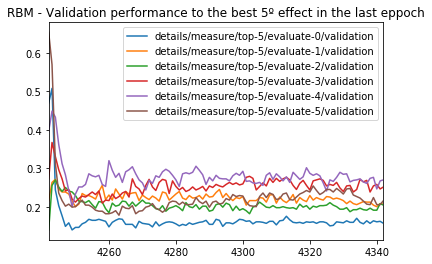

In [17]:
detail_filter = data.iloc[4278].path[7:]

ax = data[data['path'].str.contains(detail_filter)][columns].plot()
#ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Validation performance to the best 5º effect in the last eppoch')